# Lab 6

Making a fake Poisson background data witha maean of 100

In [183]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle as pk
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Problem 1
The first problem is to look at your background distribution and determine where the 5 sigma sensitivity threshold is.

The code below sets up background noise of the problem with a mean of 100 and a size of 10000.

In [184]:
#---- PROBLEM SET UP ----

#mean background noise (average counnts)
mean = 100

#size
size = 10000

#poisson distribution cosmic-ray background noise data
background = stats.poisson.rvs(mu=mean, size=size, random_state=1)

#discrete random variable, number of occurances of cosmic-rays 
k = np.arange(60,140)

#pmf of background data
pmfBackground = stats.poisson.pmf(mu=mean, k=k)

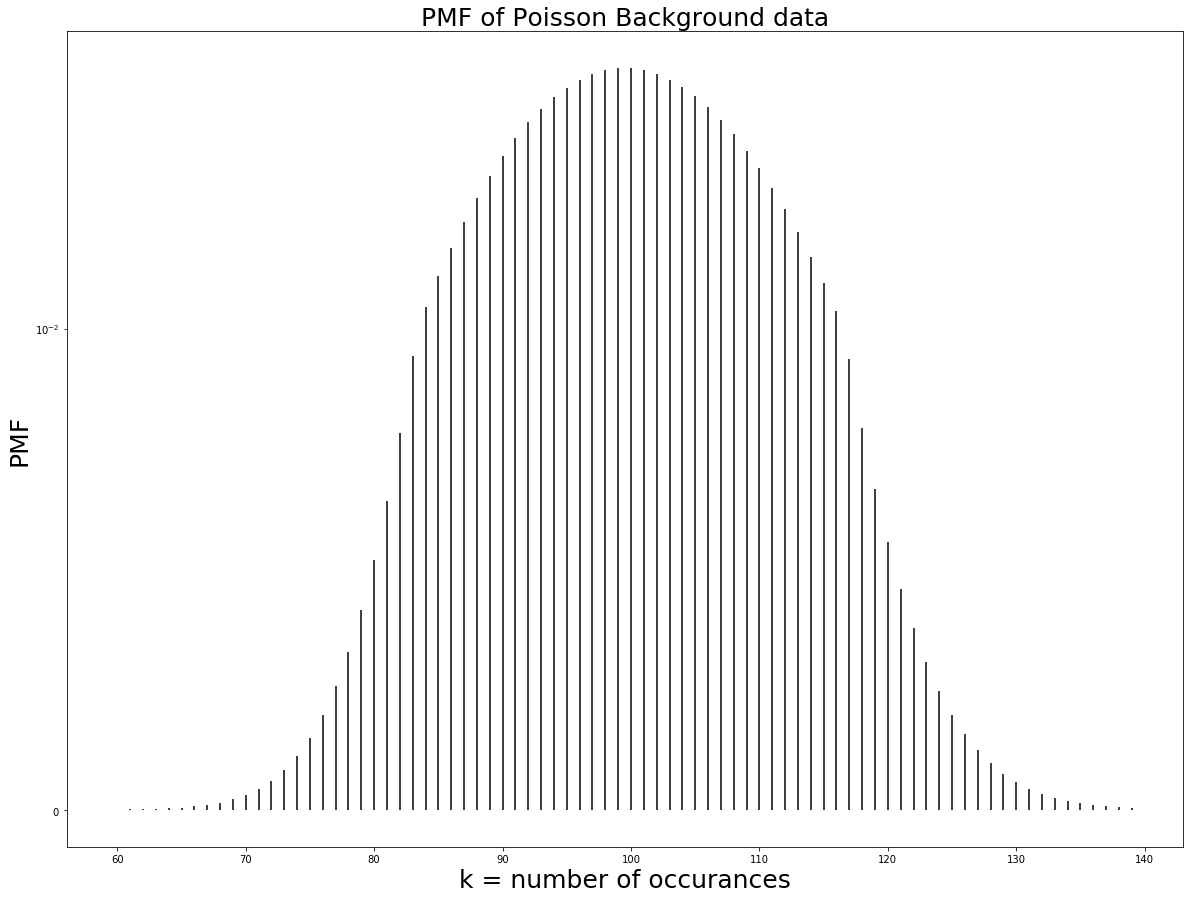

99.9792

In [185]:
# Plot background distribution
fig, ax1 = plt.subplots(1,1)

ax1.vlines(k, 0, pmfBackground)
ax1.set_yscale('symlog', nonposy='clip', linthreshy=0.01)

#styles
ax1.set_xlabel('k = number of occurances', size = 25)
ax1.set_ylabel('PMF', size = 25)
ax1.set_title('PMF of Poisson Background data', size = 25)
plt.show()
background.mean()

In [186]:
sigma5 = 5;

probability = stats.norm.sf(sigma5)

print('5 sigma probability = ', probability)

5 sigma probability =  2.866515718791933e-07


In [187]:
print('Signal Strength coresponding to 5 sigma detection:')
signalStrength = stats.poisson.isf(probability,mu=mean, loc=0)
print('- higher signal strength = ', signalStrength)

signalStrength = stats.poisson.isf(1-probability, mu=mean, loc=0)
print('- lower signal strength =', signalStrength)

Signal Strength coresponding to 5 sigma detection:
- higher signal strength =  154.0
- lower signal strength = 54.0


The signal strength corresponding to a 5 sigma detection from the background signal has a lower bound of 54, and an upper bound of 154, with the range of 5 sigma detection signals inbetween these values. 

### Problem 2
In this problem we inject a known signal of strength 8 sigma into the background data many times. Then Histogram the brightness of the observed signal.

#### a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

Now we will inject the signal values corresponding to a 8 sigma probabiltiy into our background data. 

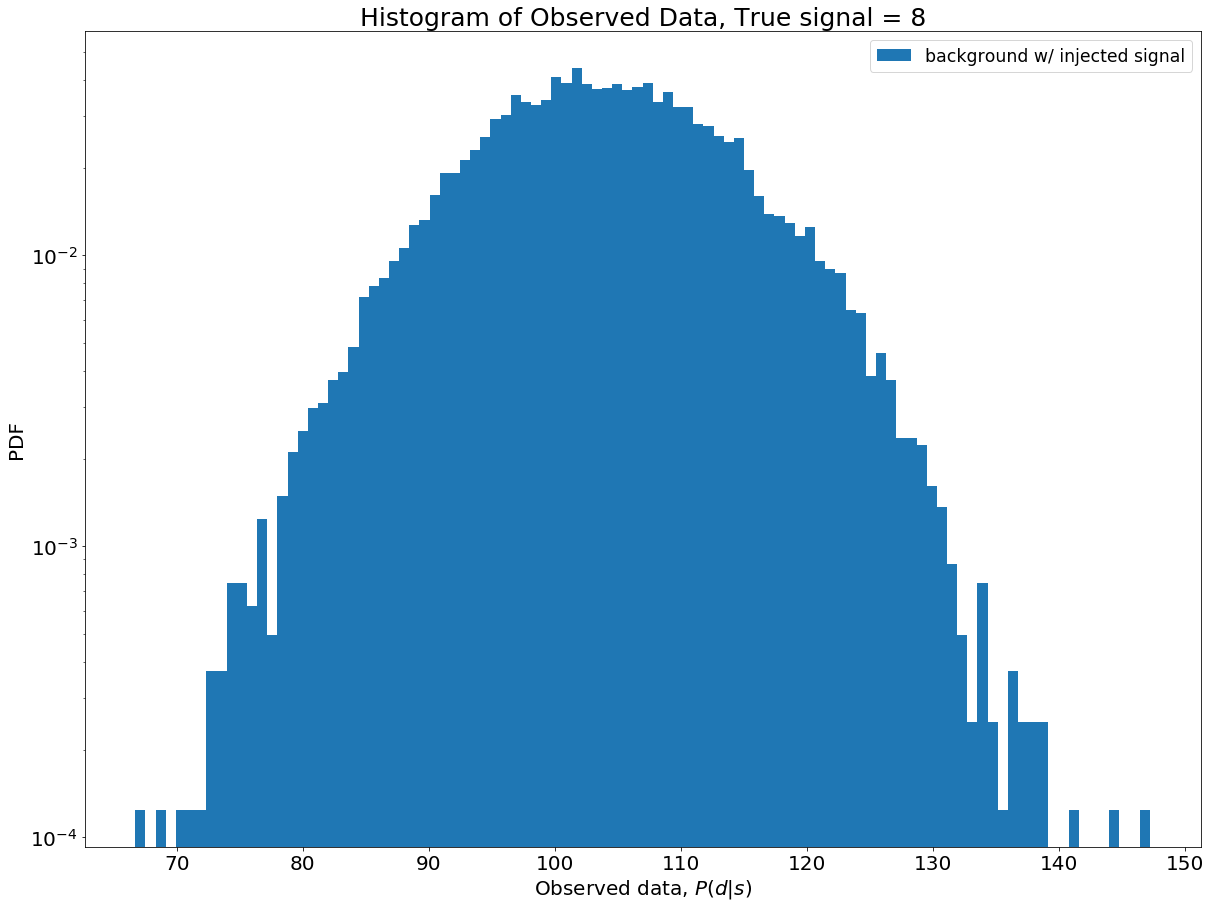

mean: 103.98483884542166


In [206]:
#poisson distribution cosmic-ray background noise data
background = stats.poisson.rvs(mu=100, size=10000, random_state=1)

#new signal using same as from hw
#Change scale (std, sigma) to 8
signal = stats.uniform.rvs(loc = 0, scale = 8, size = size)


#background is defined up top.
#this is the same way done in HW5 also
data = background + signal

#---Plot histogram
fix, ax = plt.subplots(1,1)
plt.yscale('log')
ax.hist(data, bins = 100, density=True, label='background w/ injected signal')
#Style plot
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Observed data, $P(d|s)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('Histogram of Observed Data, True signal = 8', size = 25)
ax.legend(loc = 'best', fontsize = 'xx-large')
plt.show()

print('mean:',data.mean())

The histogram above is a probability distribution of the observed data. The observed data is the background data plus the injected true signal data. The injected true signal data has a signal strength of 8 sigma. This graph shows the range of all possible observed values when the true signal equals 8.

The mean is about 104, and the distribution is pretty symmetric about this point. 

#### b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

Yes the observed signal is biased. It is much more likely that the observed value is stronger than the true injected signal, as we can see from the graph above, the true signal is 8, but the observed data is much larger than 8 by aboout ~ 92.

From the graph above the observed signal looks like a symmetric distribution about the mean of 104.

### Problem 3

Now we will inject a range of true signals with varying strengths between 5 and 30 sigma into the background data.

#### a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data

Here we are simulating observed data and an actual true signal, and the correlation between them

Text(0.5, 1.0, '2-D Histogram of Observed Data vs. True Injected Signal')

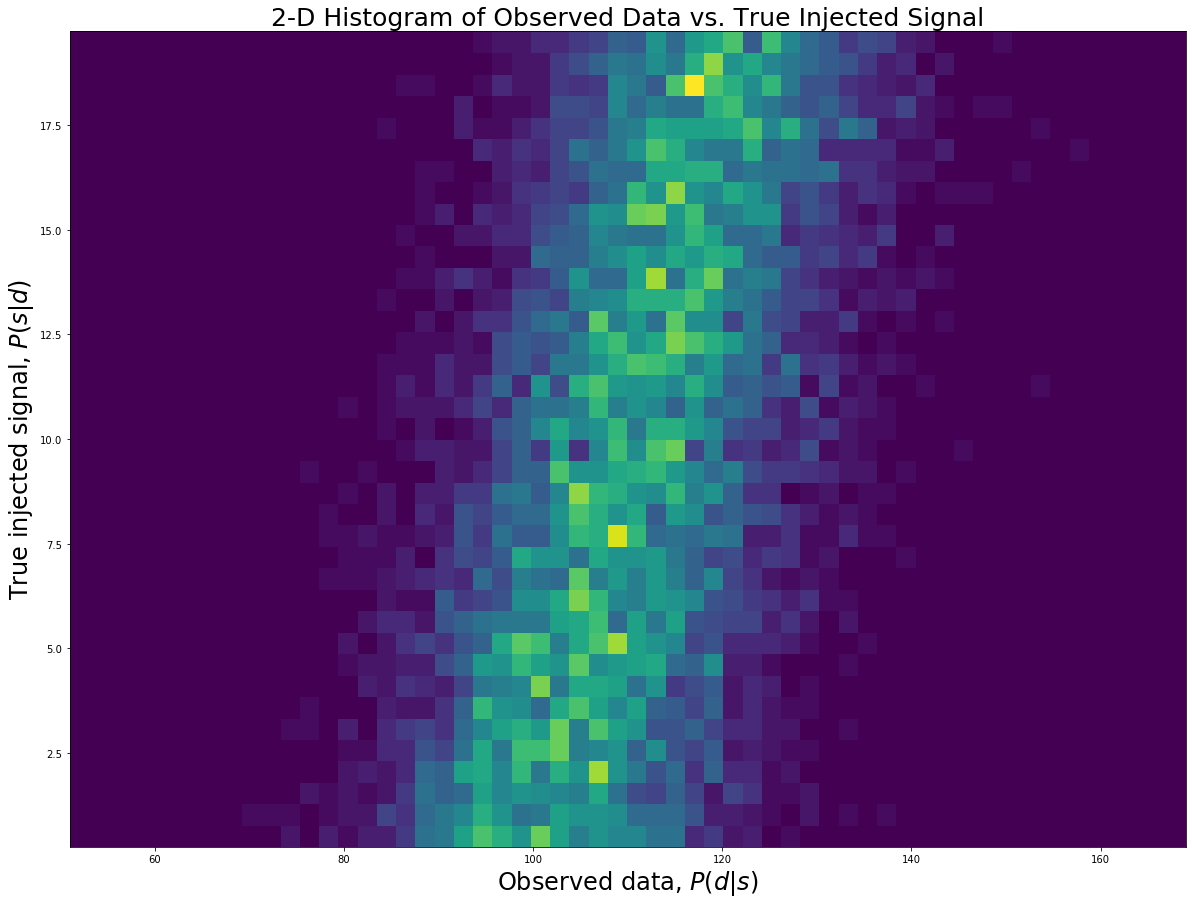

In [201]:

#poisson distribution cosmic-ray background noise data
background = stats.poisson.rvs(mu=100, size=10000, random_state=1)

#need to change strengnth?
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 10000)

#---given code---

#the is the combination of background data and injected signal 
data = background + signal


#index of y axis is in steps of 0.5
signaledges = np.linspace(0,20,40)

#index of y axis is in steps of 2
dataedges = np.linspace(50,170,60)



Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('2-D Histogram of Observed Data vs. True Injected Signal', size = 25)

#### b) For the same injected signal power as in problem 2, show that you get the same answer.

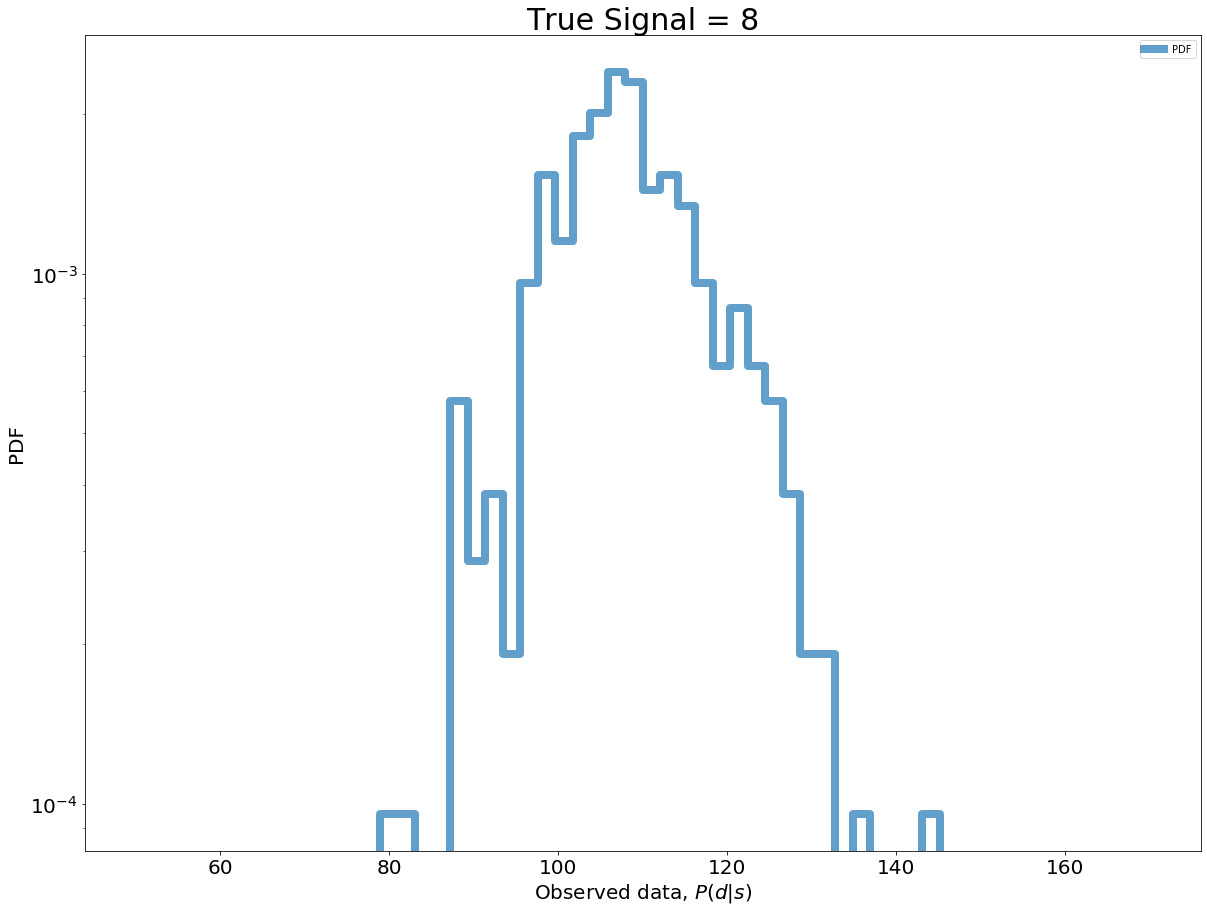

In [200]:
#-----Plot Horizontal Sclice ------
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shape x-axis to same size as Psd[:, ]
dataedges = np.linspace(50,170,59)

#calculate index (in steps of 0.5)
stats.norm.pdf(Psd[:,16])
ax.step(dataedges,Psd[:,16], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('Observed data, $P(d|s)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('True Signal = 8', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

#Psd[:,16].mean()

By inspection, this graph looks like the same probability distribution of Observed data coresponding to a True signal of 8.

The mean is also at about 104, the same as in problem 2. 

#### c) Now reverse the problem, select an observed data value and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

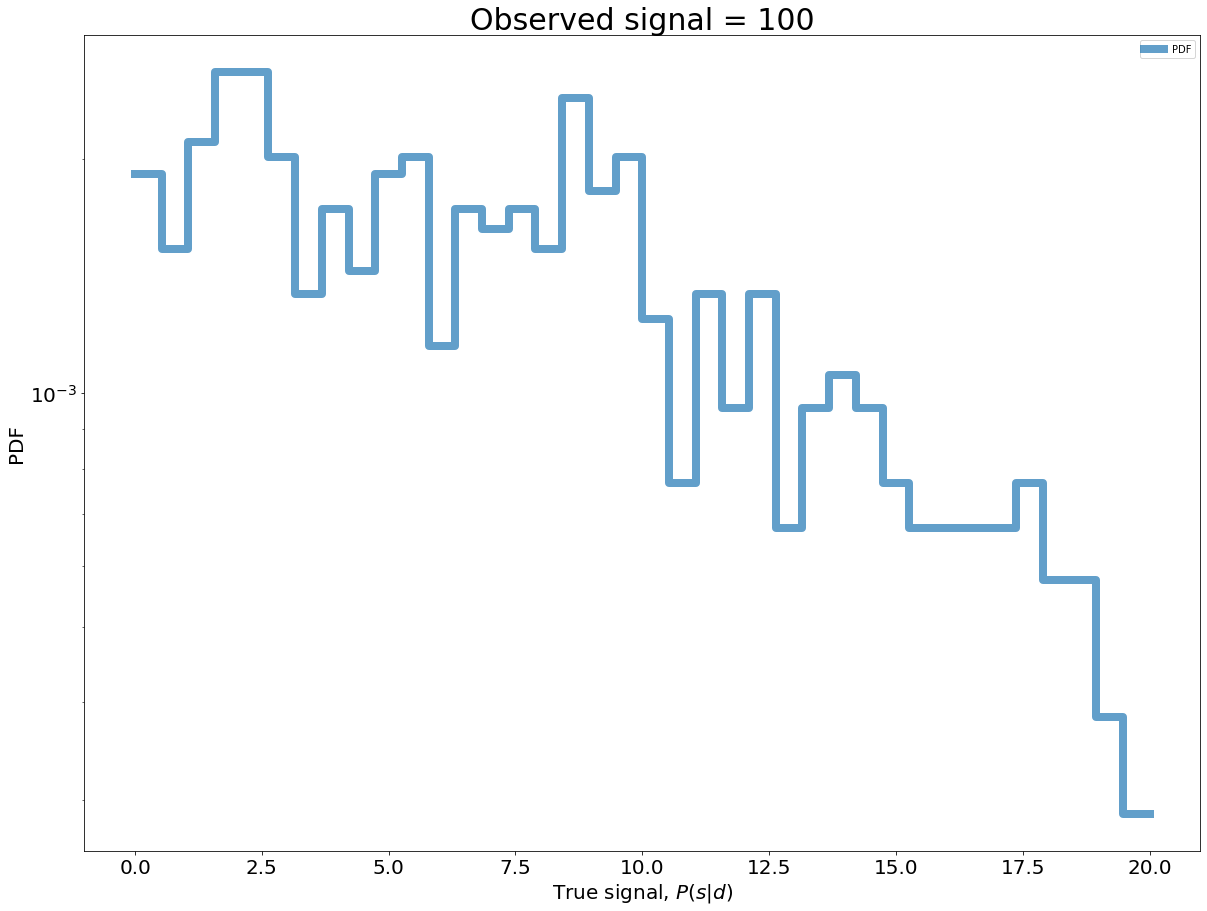

In [203]:
#-----Plot Vertical------
fig, ax = plt.subplots(1, 1)
plt.yscale('log')

#re-shaping x axis to same size as data
signaledges = np.linspace(0,20,39)

ax.step(signaledges,Psd[25,:], linewidth = 8,alpha = 0.7, label='PDF')

#Setting plot title and lables
ax.set_xlabel('True signal, $P(s|d)$', size = 20)
ax.set_ylabel('PDF', size = 20)
ax.set_title('Observed signal = 100', size = 30)
plt.tick_params(labelsize = 20)
plt.legend()
plt.show()

This is the true signal probability distribution when the observed signal equals 100.

By looking at the 2-D histogram, it looks like this probabiltiy distribution alligns with it. 

Additionally, the mean of the true signal is about 8, which coresponds to the results we found in problem 2, that the observed signal is larger by about ~ 92.

#### d) For your observed signal, what is the 1σ uncertainty on the true signal strength?